In [1]:
import numpy as np

# Prediksi probabilitas (softmax output)
y_pred = np.array([0.1, 0.7, 0.2])  # model yakin kelas 1
y_true = np.array([0, 1, 0])        # jawaban benar = kelas 1

# Cross-entropy loss
loss = -np.sum(y_true * np.log(y_pred))
print("Loss:", loss)


Loss: 0.35667494393873245


Feature map shape sebelum pooling: (1, 32, 32, 4)
Feature map shape sesudah pooling: (1, 16, 16, 4)


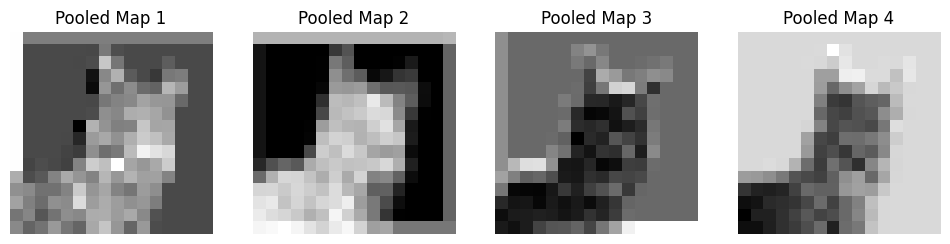

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Baca gambar kucing RGB dan resize ke 32x32
img = tf.io.read_file("cat.jpeg")
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, [32, 32])
img = tf.image.convert_image_dtype(img, tf.float32)
img_batch = tf.expand_dims(img, axis=0)  # (1, 32, 32, 3)

# 2. Convolution layer (4 filter)
conv_layer = tf.keras.layers.Conv2D(filters=4, kernel_size=(3,3), padding="same")
feature_maps = conv_layer(img_batch)

print("Feature map shape sebelum pooling:", feature_maps.shape)  # (1, 32, 32, 4)

# 3. Pooling layer
pool_layer = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2)
pooled_maps = pool_layer(feature_maps)

print("Feature map shape sesudah pooling:", pooled_maps.shape)  # (1, 16, 16, 4)

# 4. Visualisasi hasil pooling
fig, axes = plt.subplots(1, 4, figsize=(12,4))
for i in range(4):
    axes[i].imshow(pooled_maps[0,:,:,i], cmap="gray")
    axes[i].set_title(f"Pooled Map {i+1}")
    axes[i].axis("off")
plt.show()


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Input gambar kucing RGB 32x32
img = tf.io.read_file("cat.jpeg")
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, [32, 32])
img = tf.image.convert_image_dtype(img, tf.float32)
img_batch = tf.expand_dims(img, axis=0)  # (1, 32, 32, 3)

# 2. Convolution + Pooling
conv_layer = tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), padding="same", activation="relu")
pool_layer = tf.keras.layers.MaxPooling2D(pool_size=(2,2))

x = conv_layer(img_batch)
x = pool_layer(x)

print("Shape setelah conv+pool:", x.shape)  # (1, 16, 16, 8)

# 3. Flatten → Dense Layer
flatten_layer = tf.keras.layers.Flatten()
dense_layer1 = tf.keras.layers.Dense(32, activation="relu")   # hidden layer
dense_layer2 = tf.keras.layers.Dense(10)                      # output logits (misal 10 kelas)

x = flatten_layer(x)
x = dense_layer1(x)
logits = dense_layer2(x)

print("Shape setelah flatten:", flatten_layer(conv_layer(img_batch)).shape)  # (1, 2048)
print("Logits shape:", logits.shape)  # (1, 10)


Shape setelah conv+pool: (1, 16, 16, 8)
Shape setelah flatten: (1, 8192)
Logits shape: (1, 10)
